In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('LAB_DATA_MSM.xlsx', sheet_name = 'РС')
columns = [
    '2012, Коэффициент обеспеченности собственными оборотными средствами, %',
    '2012, Коэффициент соотношения заемных и собственных средств, %',
    '2012, Коэффициент текущей ликвидности, %',
    '2012, Кредиторская задолженность, ед. RUB',
    '2012, Нераспределенная прибыль (непокрытый убыток), ед. RUB',
    '2012, Оборотные активы, ед. RUB',
    '2012, Основные средства , ед. RUB',
    '2012, Прибыль (убыток) до налогообложения , ед. RUB',
    '2012, Прибыль (убыток) от продажи, ед. RUB',
    '2012, Рентабельность активов (ROA), %'




]
Y = data['Размер компании']
data = data[columns][201:304]

# Проверяем наличие пропущенных значений
missing_values = data.isnull().sum()
print(f"\nПропущенные значения по показателям:")
print(missing_values[missing_values > 0])

# Заполняем пропущенные значения медианой
data_for_pca_filled = data.fillna(data.median())

# Удаляем строки, где все значения NaN (на всякий случай)
data_for_pca_clean = data_for_pca_filled.dropna(how='all')
data = np.array(data_for_pca_clean).T



Пропущенные значения по показателям:
2012, Основные средства , ед. RUB        3
2012, Рентабельность активов (ROA), %    2
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

'''scaler = StandardScaler()
data = scaler.fit_transform(data)'''

data = np.array([(i-i.mean())/np.std(i) for i in data])



In [ ]:
A = np.cov(data)

In [ ]:
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9
0,1.009804,-0.007545,0.370824,0.004701,0.281342,0.119834,-0.244956,0.265931,0.244015,0.348220
1,-0.007545,1.009804,0.057158,-0.010420,-0.045567,0.232868,-0.041594,0.389795,0.355874,0.044085
2,0.370824,0.057158,1.009804,-0.118956,0.354675,0.071188,0.130434,0.273054,0.305719,0.165832
3,0.004701,-0.010420,-0.118956,1.009804,-0.065428,0.777250,0.060902,0.208796,0.227291,-0.154615
4,0.281342,-0.045567,0.354675,-0.065428,1.009804,0.185400,0.462120,0.643851,0.602287,0.298882
5,0.119834,0.232868,0.071188,0.777250,0.185400,1.009804,0.182370,0.532973,0.578429,-0.122137
6,-0.244956,-0.041594,0.130434,0.060902,0.462120,0.182370,1.009804,0.254877,0.315369,-0.106115
7,0.265931,0.389795,0.273054,0.208796,0.643851,0.532973,0.254877,1.009804,0.934738,0.541277
8,0.244015,0.355874,0.305719,0.227291,0.602287,0.578429,0.315369,0.934738,1.009804,0.411129
9,0.348220,0.044085,0.165832,-0.154615,0.298882,-0.122137,-0.106115,0.541277,0.411129,1.009804


In [ ]:
#Находим собственные значения и собственные векторы матрицы ковариаций
eig_val, eig_vec = np.linalg.eig(A)

idx = np.argsort(eig_val)
eig_vec = eig_vec[:, idx]
print("\nСобственные значения (упорядоченные по убыванию):")
for i, val in enumerate(eig_val, 1):
  print(f"λ{i}: {val}")
idx


Собственные значения (упорядоченные по убыванию):
λ1: 3.5542996325044713
λ2: 1.9103151851479634
λ3: 1.3832913493869237
λ4: 1.1334434158860414
λ5: 0.9026087600516595
λ6: 0.5027767003642376
λ7: 0.3513617936442071
λ8: 0.2140754776396161
λ9: 0.04605976155391427
λ10: 0.09980713950724385


array([8, 9, 7, 6, 5, 4, 3, 2, 1, 0])

In [ ]:
#Отбор главных компонент по доле суммарной дисперсии
res = 0
i = -1
while res<0.7:
  i+=1
  res += eig_val[i]/np.trace(A)
  print(f'Доля объясненной дисперсии для {i+1} компонент: {res:.6f}')

Доля объясненной дисперсии для 1 компонент: 0.351979
Доля объясненной дисперсии для 2 компонент: 0.541156
Доля объясненной дисперсии для 3 компонент: 0.678142
Доля объясненной дисперсии для 4 компонент: 0.790386


In [ ]:
#Запишем выражения для обобщенных факторов через исходные признаки (оценки векторов значений обобщенных факторов)
f = eig_vec[:,:4] .T @ data



In [ ]:
f.shape

(4, 103)

In [ ]:
#предобработка данных
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

#иерархическая кластеризация


In [ ]:
f_feat = f.T


In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Кластеризация иерархическим методом AglomerativeClustering

def ward(x_i, x_j):
    n_i = len(x_i)
    n_j = len(x_j)
    m1 = np.mean(x_i, axis = 0)
    m2 = np.mean(x_j, axis = 0)
    metrics = np.sum((m1-m2)**2)**0.5
    return n_i*n_j/(n_i+n_j)*metrics**2

def Agglomerative_clusters(X,K):

    labels = np.arange(len(X))#метки кластеров
    clasters = [[x] for x in X]
    while len(clasters) > K:
        mn = float('+inf')
        for i in range(len(clasters)-1):
            for j in range(i+1, len(clasters)):
                m = ward(clasters[i],clasters[j])
                if m<mn:
                    mn = m
                    mn_ind = (i,j)
        labels[labels == mn_ind[1]] = mn_ind[0]
        labels[labels > mn_ind[1]] -= 1

        clasters[mn_ind[0]].extend(clasters.pop(mn_ind[1]))
    return labels

marks = Agglomerative_clusters(f_feat,2)
marks

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
marks == Y[201:304]
Q = np.sum(marks == Y[201:304])/len(Y[201:304])
Q

np.float64(0.7378640776699029)

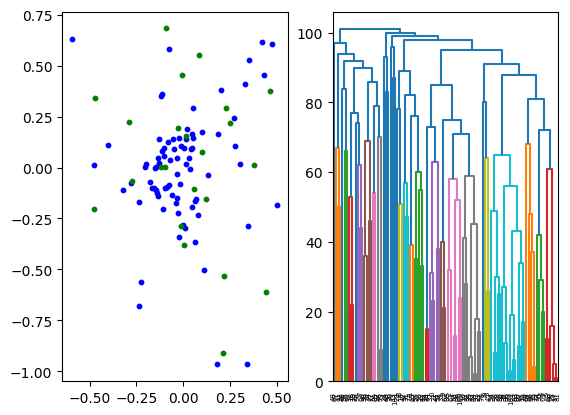

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from itertools import cycle
K = 2
clustering = AgglomerativeClustering(n_clusters=K, linkage="ward", metric="euclidean")
res = clustering.fit_predict(f_feat)

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
f, ax = plt.subplots(1, 2)
for c, n in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), range(K)):
    clst = f_feat[res == n].T
    ax[0].scatter(clst[0], clst[1], s=10, color=c)
plot_dendrogram(clustering, ax=ax[1])
plt.show()

In [ ]:
res == marks

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
eig_vec.shape

(10, 10)

In [ ]:
X_pca = f_feat
X_pca.shape

(103, 4)

In [ ]:
from scipy.stats import f
def crit1(y, labels, j):
  #Гипотеза о равенстве средних для разных уровней фактора
  n_labels = len(np.unique(labels))
  y_mean = np.mean(y)#общее среднее

  SSB = 0#
  for i in range(n_labels):
      mask = labels==i
      y_i_mean =  y[mask].mean()
      n_i = len(mask)
      SSB += n_i*(y_i_mean-y_mean)**2

  SSR = 0#
  for i in range(n_labels):
      mask =labels==i
      y_i_mean =  y[mask].mean()
      n_i = len(mask)
      y_i = y[mask]
      SSR += np.sum((y_i - y_i_mean)**2)
  k = n_labels
  n = len(y)
  F = (SSB/(k-1)) / (SSR/(n-k))
  nu1 = k - 1
  nu2 = n - k
  p_val = 1 - f.cdf(F, nu1, nu2)
  if p_val<0.05:
    print(f'Средние значения фактора {j} по кластерам (уровням) значимо различаются')
  else:
    print(f'Средние значения фактора {j} по кластерам (уровням) НЕ различаются')

labels = marks
for i in range(X_pca.shape[1]):
  y = X_pca[:,i]
  crit1(y, labels, i)

Средние значения фактора 0 по кластерам (уровням) НЕ различаются
Средние значения фактора 1 по кластерам (уровням) НЕ различаются
Средние значения фактора 2 по кластерам (уровням) НЕ различаются
Средние значения фактора 3 по кластерам (уровням) значимо различаются


In [ ]:
marks = Agglomerative_clusters(X_pca,3)
for i in range(X_pca.shape[1]):
  y = X_pca[:,i]
  crit1(y, marks, i)

Средние значения фактора 0 по кластерам (уровням) НЕ различаются
Средние значения фактора 1 по кластерам (уровням) значимо различаются
Средние значения фактора 2 по кластерам (уровням) значимо различаются
Средние значения фактора 3 по кластерам (уровням) значимо различаются


In [ ]:
marks = Agglomerative_clusters(X_pca,4)
for i in range(X_pca.shape[1]):
  y = X_pca[:,i]
  crit1(y, marks, i)

Средние значения фактора 0 по кластерам (уровням) значимо различаются
Средние значения фактора 1 по кластерам (уровням) значимо различаются
Средние значения фактора 2 по кластерам (уровням) значимо различаются
Средние значения фактора 3 по кластерам (уровням) значимо различаются


In [ ]:
marks = Agglomerative_clusters(X_pca,5)
for i in range(X_pca.shape[1]):
  y = X_pca[:,i]
  crit1(y, marks, i)

Средние значения фактора 0 по кластерам (уровням) значимо различаются
Средние значения фактора 1 по кластерам (уровням) значимо различаются
Средние значения фактора 2 по кластерам (уровням) значимо различаются
Средние значения фактора 3 по кластерам (уровням) значимо различаются


In [ ]:
def crit2(y, labels, l, j):
  #Метод множественных сравнений Шеффе
  #Гипотеза о равенстве средних
  k = len(np.unique(labels))
  n = len(y)
  y_mean = np.mean(y)#общее среднее
  SSR = 0#
  for i in range(k):
      mask =labels==i
      y_i_mean =  y[mask].mean()
      n_i = len(mask)
      y_i = y[mask]
      SSR += np.sum((y_i - y_i_mean)**2)

  MSR = SSR/(n-k)
  nu1 = k - 1
  nu2 = n - k
  y_l_mean = y[labels == l].mean()
  y_j_mean = y[labels == j].mean()
  n_l = len(y[labels == l])
  n_j = len(y[labels == j])
  F = (y_l_mean - y_j_mean)**2/(nu1*MSR*(1/n_l + 1/n_j))
  F_critical = f.ppf(1 - 0.05, nu1, nu2)

  if F_critical > F:
    print(f'Средние значения факторов {l} и {j} НЕ отличаются')
    return False
  else:
    print(f'Средние значения факторов {l} и {j} значимо отличаются')
    return True


In [ ]:
'''Проверка критерия, что для каждой пары различных кластеров существует значимое
различие средних хотя бы для одного фактора (главной компоненты)'''
def check_crit_2(X_pca, labels):
  flag =True
  for i in range(k):
    if not flag:
        break
    for j in range(i+1, k):
      s = 0
      for r in range(X_pca.shape[1]):
        y = X_pca[:, r]
        s += crit2(y, labels, i, j)
      print()
      if s==0:
        print('Критерий не выполнен')
        flag = False
        break

In [ ]:

k = len(np.unique(labels))

check_crit_2(X_pca, labels)

Средние значения факторов 0 и 1 НЕ отличаются
Средние значения факторов 0 и 1 НЕ отличаются
Средние значения факторов 0 и 1 НЕ отличаются
Средние значения факторов 0 и 1 значимо отличаются



In [ ]:
labels = Agglomerative_clusters(X_pca,4)
k = len(np.unique(labels))
check_crit_2(X_pca, labels)

Средние значения факторов 0 и 1 НЕ отличаются
Средние значения факторов 0 и 1 НЕ отличаются
Средние значения факторов 0 и 1 НЕ отличаются
Средние значения факторов 0 и 1 значимо отличаются

Средние значения факторов 0 и 2 НЕ отличаются
Средние значения факторов 0 и 2 значимо отличаются
Средние значения факторов 0 и 2 значимо отличаются
Средние значения факторов 0 и 2 НЕ отличаются

Средние значения факторов 0 и 3 НЕ отличаются
Средние значения факторов 0 и 3 НЕ отличаются
Средние значения факторов 0 и 3 значимо отличаются
Средние значения факторов 0 и 3 значимо отличаются

Средние значения факторов 1 и 2 НЕ отличаются
Средние значения факторов 1 и 2 значимо отличаются
Средние значения факторов 1 и 2 значимо отличаются
Средние значения факторов 1 и 2 значимо отличаются

Средние значения факторов 1 и 3 НЕ отличаются
Средние значения факторов 1 и 3 НЕ отличаются
Средние значения факторов 1 и 3 значимо отличаются
Средние значения факторов 1 и 3 значимо отличаются

Средние значения факторов

In [ ]:
labels = Agglomerative_clusters(X_pca,5)
k = len(np.unique(labels))
check_crit_2(X_pca, labels)

Средние значения факторов 0 и 1 значимо отличаются
Средние значения факторов 0 и 1 значимо отличаются
Средние значения факторов 0 и 1 значимо отличаются
Средние значения факторов 0 и 1 НЕ отличаются

Средние значения факторов 0 и 2 НЕ отличаются
Средние значения факторов 0 и 2 НЕ отличаются
Средние значения факторов 0 и 2 НЕ отличаются
Средние значения факторов 0 и 2 значимо отличаются

Средние значения факторов 0 и 3 НЕ отличаются
Средние значения факторов 0 и 3 значимо отличаются
Средние значения факторов 0 и 3 значимо отличаются
Средние значения факторов 0 и 3 НЕ отличаются

Средние значения факторов 0 и 4 НЕ отличаются
Средние значения факторов 0 и 4 НЕ отличаются
Средние значения факторов 0 и 4 значимо отличаются
Средние значения факторов 0 и 4 значимо отличаются

Средние значения факторов 1 и 2 значимо отличаются
Средние значения факторов 1 и 2 значимо отличаются
Средние значения факторов 1 и 2 значимо отличаются
Средние значения факторов 1 и 2 значимо отличаются

Средние значени

In [ ]:
for i in range(6):
  print(f"Проверка для кластера {i+5+1}")
  labels = Agglomerative_clusters(X_pca,5+i+1)
  k = len(np.unique(labels))
  check_crit_2(X_pca, labels)


Проверка для кластера 6
Средние значения факторов 0 и 1 значимо отличаются
Средние значения факторов 0 и 1 значимо отличаются
Средние значения факторов 0 и 1 значимо отличаются
Средние значения факторов 0 и 1 НЕ отличаются

Средние значения факторов 0 и 2 НЕ отличаются
Средние значения факторов 0 и 2 НЕ отличаются
Средние значения факторов 0 и 2 НЕ отличаются
Средние значения факторов 0 и 2 значимо отличаются

Средние значения факторов 0 и 3 НЕ отличаются
Средние значения факторов 0 и 3 значимо отличаются
Средние значения факторов 0 и 3 значимо отличаются
Средние значения факторов 0 и 3 НЕ отличаются

Средние значения факторов 0 и 4 НЕ отличаются
Средние значения факторов 0 и 4 НЕ отличаются
Средние значения факторов 0 и 4 значимо отличаются
Средние значения факторов 0 и 4 значимо отличаются

Средние значения факторов 0 и 5 НЕ отличаются
Средние значения факторов 0 и 5 НЕ отличаются
Средние значения факторов 0 и 5 значимо отличаются
Средние значения факторов 0 и 5 значимо отличаются

С

In [ ]:
print('Оптимальное количество кластеров: 10')

Оптимальное количество кластеров: 10


In [ ]:
f_feat.shape

(103, 4)

In [ ]:
# метод k-средних (KMeans)
n_init = 8  # количество итераций
K = 10

M = np.mean(f_feat, axis=0)
D = np.std(f_feat, axis=0)

ma = [np.random.normal(M, np.sqrt(D / 10), f_feat.shape[1]) for i in range(K)]

metrics = lambda x, y: np.mean((x - y) ** 2)
ma_0 = ma.copy()

while n_init != 0:
    clusters = [[] for i in range(K)]

    for point in f_feat:
        all_len = [metrics(point, center) for center in ma]
        ind = np.argmin(all_len)
        clusters[ind].append(point)

    ma = []
    for cluster in clusters:
        ma.append(np.mean(cluster, axis=0))

    n_init -= 1

labels_kmeans = np.zeros(len(f_feat), dtype=int)

for idx, point in enumerate(f_feat):
    distances = [metrics(point, center) for center in ma]
    labels_kmeans[idx] = np.argmin(distances)

print("Метки кластеров K-means:")
print(labels_kmeans)


Метки кластеров K-means:
[2 6 2 5 5 9 6 0 6 2 2 0 6 7 5 5 6 5 2 2 6 2 5 5 8 5 2 5 5 0 1 3 2 7 4 5 5
 2 5 5 4 3 9 5 2 5 3 6 0 8 6 4 3 2 5 4 0 2 0 6 5 2 6 7 7 7 2 0 9 5 0 5 2 3
 5 5 5 9 5 5 5 5 2 5 2 4 2 5 2 4 5 5 0 2 5 5 0 3 8 5 2 4 5]


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)

labels_kmeans1 = kmeans.fit_predict(f_feat)

In [ ]:
for i in range(X_pca.shape[1]):
  y = X_pca[:,i]
  crit1(y, labels_kmeans, i)

Средние значения фактора 0 по кластерам (уровням) значимо различаются
Средние значения фактора 1 по кластерам (уровням) значимо различаются
Средние значения фактора 2 по кластерам (уровням) значимо различаются
Средние значения фактора 3 по кластерам (уровням) значимо различаются


In [ ]:
check_crit_2(X_pca, labels_kmeans)

Средние значения факторов 0 и 1 НЕ отличаются
Средние значения факторов 0 и 1 НЕ отличаются
Средние значения факторов 0 и 1 значимо отличаются
Средние значения факторов 0 и 1 значимо отличаются

Средние значения факторов 0 и 2 НЕ отличаются
Средние значения факторов 0 и 2 НЕ отличаются
Средние значения факторов 0 и 2 НЕ отличаются
Средние значения факторов 0 и 2 значимо отличаются

Средние значения факторов 0 и 3 НЕ отличаются
Средние значения факторов 0 и 3 НЕ отличаются
Средние значения факторов 0 и 3 значимо отличаются
Средние значения факторов 0 и 3 значимо отличаются

Средние значения факторов 0 и 4 НЕ отличаются
Средние значения факторов 0 и 4 НЕ отличаются
Средние значения факторов 0 и 4 значимо отличаются
Средние значения факторов 0 и 4 НЕ отличаются

Средние значения факторов 0 и 5 НЕ отличаются
Средние значения факторов 0 и 5 НЕ отличаются
Средние значения факторов 0 и 5 НЕ отличаются
Средние значения факторов 0 и 5 значимо отличаются

Средние значения факторов 0 и 6 НЕ отлич

/tmp/ipython-input-4240669515.py:19: RuntimeWarning: Mean of empty slice.
  y_j_mean = y[labels == j].mean()
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: division by zero

In [ ]:
print("Для меток, полученных методом k-means с 10 кластерами, критерий 2 не выполняется ")

In [ ]:
#Сумма средних квадратов расстояний до центров кластеров
# Функция расстояния (средний квадрат ошибки) (компактность кластеров)

In [ ]:
labels_kmeans

array([2, 6, 2, 5, 5, 9, 6, 0, 6, 2, 2, 0, 6, 7, 5, 5, 6, 5, 2, 2, 6, 2,
       5, 5, 8, 5, 2, 5, 5, 0, 1, 3, 2, 7, 4, 5, 5, 2, 5, 5, 4, 3, 9, 5,
       2, 5, 3, 6, 0, 8, 6, 4, 3, 2, 5, 4, 0, 2, 0, 6, 5, 2, 6, 7, 7, 7,
       2, 0, 9, 5, 0, 5, 2, 3, 5, 5, 5, 9, 5, 5, 5, 5, 2, 5, 2, 4, 2, 5,
       2, 4, 5, 5, 0, 2, 5, 5, 0, 3, 8, 5, 2, 4, 5])

In [ ]:
for label in range(K):
    cluster_points = X_pca[labels_kmeans == label]
    print(cluster_points.shape)

(10, 4)
(1, 4)
(22, 4)
(6, 4)
(7, 4)
(35, 4)
(10, 4)
(5, 4)
(3, 4)
(4, 4)


In [ ]:
X_pca.shape

(103, 4)

In [ ]:
K = 10
centers = []

for label in range(K):
    cluster_points = X_pca[labels_kmeans == label]
    center = cluster_points.mean(axis =0)
    centers.append(center)

In [ ]:
np.array(centers).shape

(10, 4)

In [ ]:
ma = centers
sm = 0
total_sum = 0
for i in range(K):
  mask = labels_kmeans == i
  f_i = f_feat[mask]
  for x_i in f_i:
    sm += metrics(x_i, ma[i])/len(f_i)
  total_sum+= sm
total_sum

np.float64(3.324544267748667)

In [ ]:
marks =  Agglomerative_clusters(f_feat,10)
#model = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
#marks = model.fit_predict(f_feat)

In [ ]:
centers = []
for label in range(K):
    # Находим точки в кластере
    mask = marks== label
    cluster_points = f_feat[mask]

    if len(cluster_points) > 0:
        # Центр = среднее арифметическое точек
        center = np.mean(cluster_points, axis=0)
        centers.append(center)
centers = np.array(centers)
centers.shape

(10, 4)

In [ ]:
sm = 0
total_sum = 0
for i in range(K):
  mask = marks == i
  f_i = f_feat[mask]
  for x_i in f_i:
    sm += metrics(x_i, centers[i])/len(f_i)
  total_sum+= sm
total_sum

np.float64(2.068997655592539)